In [26]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt   #from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [27]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [44]:
iris = load_iris()
iris = pd.DataFrame(data = np.c_[iris['data'],iris['target']],
                    columns = iris['feature_names']+['species'])
iris['species'] = iris['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [45]:
iris.rename(columns={'sepal length (cm)' : 'sepal.length',
                     'sepal width (cm)' : 'sepal.width',
                     'petal length (cm)' : 'petal.length',
                     'petal width (cm)' : 'petal.width'}, inplace=True)
iris.head(3)

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [46]:
iris[0:3]

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [47]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'species'],
      dtype='object')

In [49]:
iris['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [51]:
iris.rename(columns={iris.columns[0] : 'sl',
                     iris.columns[1] : 'sw',
                     iris.columns[2] : 'pl',
                     iris.columns[3] : 'pw',
                     iris.columns[4] : 'y'},
            inplace = True)
iris.head(3)

,sl,sw,pl,pw,y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [52]:
iris[['sl','sw']][:5]

,sl,sw
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


## EDA

In [54]:
st = iris.groupby(iris.y).mean()
st

,sl,sw,pl,pw
y,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [56]:
st.columns.name = 'variable'
st

variable,sl,sw,pl,pw
y,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


## Bar Plot

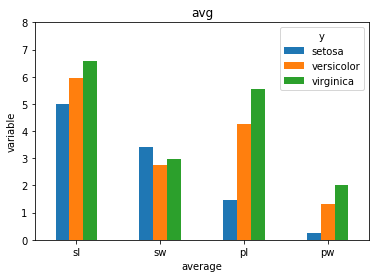

In [57]:
st.T.plot.bar(rot=0)  #rot : titlting x-axis variable name
plt.title('avg')
plt.xlabel('average')
plt.ylabel('variable')
plt.ylim(0,8)
plt.show()

## Boxplot

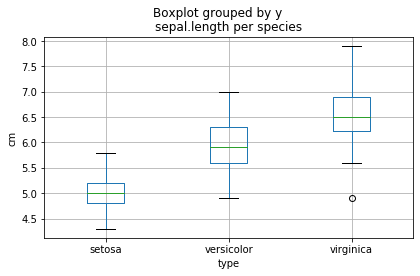

In [59]:
iris[['sl','y']].boxplot(by='y')
plt.tight_layout(pad=2, h_pad=1)
plt.title('sepal.length per species')
plt.xlabel('type')
plt.ylabel('cm')
plt.show()

https://swub.tistory.com/13